# **Data extraction from file**

In [ ]:
import io
file=open('radius.txt','r')
list=file.read().split('\n')
l=[];z=[]

for i in range(len(list)-1):
    temp=list[i].split('\t')
    if temp[3]!='':
        l.append(temp[3][0:temp[3].index('[')])
        z.append(i+1)

r2=[]
for i in range(len(z)):
    r2.append(float(l[i].strip()))
    
print(r2)

file.close()
# https://en.wikipedia.org/wiki/Atomic_radii_of_the_elements_(data_page)#cite_note-Slater1964-2

#-----------------------------------------------------------------------------------------------------------------

file=open('IE.txt','r')
str=file.read().split('\n')
IE=[]
for i in range(len(str)):
    if i>1:
        temp=str[i].split('\t')
        IE.append(float(temp[3]))

print(IE)

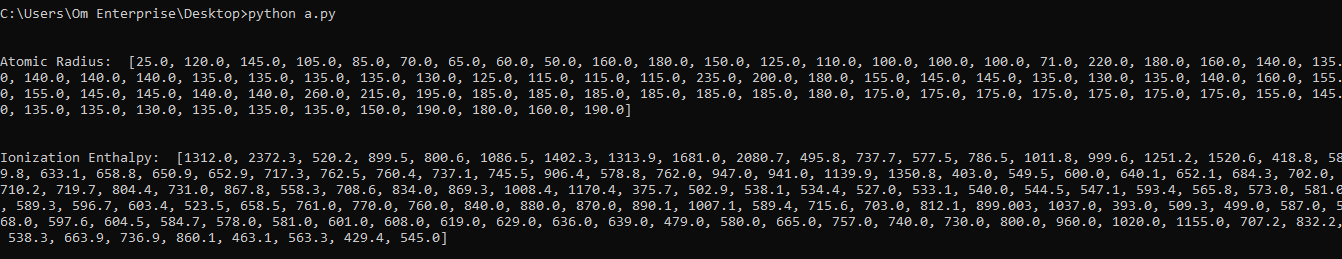

#**Libraries**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# **Data**

In [ ]:
r=np.array( [25, 120, 145, 105, 85, 70, 65, 60, 50, 160, 180, 150, 125, 110, 100, 100, 100, 
             71, 220, 180, 160, 140, 135, 140, 140, 140, 135, 135, 135, 135, 130, 125, 115, 
             115, 115, 235, 200, 180, 155, 145, 145, 135, 130, 135, 140, 160, 155, 155, 145, 
             145, 140, 140, 260, 215, 195, 185, 185, 185, 185, 185, 185, 180,
             175, 175, 175, 175, 175, 175, 175, 155, 145, 135, 135, 130, 135, 135, 135, 150, 190, 180, 160, 190]).reshape(-1,1)

z=np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
            29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56,
            57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]).reshape(-1,1)

IE_all=[1312.0, 2372.3, 520.2, 899.5, 800.6, 1086.5, 1402.3, 1313.9, 1681.0, 2080.7, 495.8, 737.7, 577.5, 786.5, 
             1011.8, 999.6, 1251.2, 1520.6, 418.8, 589.8, 633.1, 658.8, 650.9, 652.9, 717.3, 762.5, 760.4, 737.1, 745.5,
             906.4, 578.8, 762.0, 947.0, 941.0, 1139.9, 1350.8, 403.0, 549.5, 600.0, 640.1, 652.1, 684.3, 702.0, 710.2, 719.7, 
             804.4, 731.0, 867.8, 558.3, 708.6, 834.0, 869.3, 1008.4, 1170.4, 375.7, 502.9, 538.1, 534.4, 527.0, 533.1, 540.0, 
             544.5, 547.1, 593.4, 565.8, 573.0, 581.0, 589.3, 596.7, 603.4, 523.5, 658.5, 761.0, 770.0, 760.0, 840.0, 880.0, 870.0,
             890.1, 1007.1, 589.4, 715.6, 703.0, 812.1, 899.003, 1037.0, 393.0, 509.3, 499.0, 587.0, 568.0, 597.6, 604.5, 584.7, 578.0,
             581.0, 601.0, 608.0, 619.0, 629.0, 636.0, 639.0, 479.0, 580.0, 665.0, 757.0, 740.0, 730.0, 800.0, 960.0, 1020.0, 1155.0, 707.2,
             832.2, 538.3, 663.9, 736.9, 860.1, 463.1, 563.3, 429.4, 545.0]
IE=[]  
for i in z:
  IE.append(IE_all[i[0]-1])
IE=np.array(IE).reshape(-1,1)


#**Important functions**

In [ ]:
def findRow(z):
  if z==1 or z==2:
    return 0
  if 3<=z and z<=10:
    return 1
  if 11<=z and z<=18:
    return 2
  if 19<=z and z<=36:
    return 3
  else:
    return findRow(z-18)+1

def num_shells(z):
    max_electrons = 2
    num_shells = 1
    while z > max_electrons:
        num_shells += 1
        max_electrons += 2 * (num_shells ** 2)
    return num_shells


#**Preparing 4-dimensional dataset**

In [ ]:
row=[];shells=[]
for i in range(len(r)):
  a=z[i][0]
  row.append(findRow(z[i][0]))
  shells.append(num_shells(z[i][0]))
row=np.array(row).reshape(-1,1)
shells=np.array(shells).reshape(-1,1)


combine=[]
for i in range(len(r)):
  combine.append(list(z[i])+list(row[i])+list(shells[i])+list(IE[i]))
print(combine)
combine=np.array(combine)
# z,row,no_shells,Ionization enthalpy

[[1, 0, 1, 1312.0], [2, 0, 1, 2372.3], [3, 1, 2, 520.2], [4, 1, 2, 899.5], [5, 1, 2, 800.6], [6, 1, 2, 1086.5], [7, 1, 2, 1402.3], [8, 1, 2, 1313.9], [9, 1, 2, 1681.0], [10, 1, 2, 2080.7], [11, 2, 3, 495.8], [12, 2, 3, 737.7], [13, 2, 3, 577.5], [14, 2, 3, 786.5], [15, 2, 3, 1011.8], [16, 2, 3, 999.6], [17, 2, 3, 1251.2], [18, 2, 3, 1520.6], [19, 3, 3, 418.8], [20, 3, 3, 589.8], [21, 3, 3, 633.1], [22, 3, 3, 658.8], [23, 3, 3, 650.9], [24, 3, 3, 652.9], [25, 3, 3, 717.3], [26, 3, 3, 762.5], [27, 3, 3, 760.4], [28, 3, 3, 737.1], [29, 3, 4, 745.5], [30, 3, 4, 906.4], [31, 3, 4, 578.8], [32, 3, 4, 762.0], [33, 3, 4, 947.0], [34, 3, 4, 941.0], [35, 3, 4, 1139.9], [37, 4, 4, 403.0], [38, 4, 4, 549.5], [39, 4, 4, 600.0], [40, 4, 4, 640.1], [41, 4, 4, 652.1], [42, 4, 4, 684.3], [43, 4, 4, 702.0], [44, 4, 4, 710.2], [45, 4, 4, 719.7], [46, 4, 4, 804.4], [47, 4, 4, 731.0], [48, 4, 4, 867.8], [49, 4, 4, 558.3], [50, 4, 4, 708.6], [51, 4, 4, 834.0], [52, 4, 4, 869.3], [53, 4, 4, 1008.4], [55, 5, 

#**Final Data**

In [ ]:
dict={'Atomic_number':z.reshape(1,len(z))[0],'Ionization_Enthalpy(kj/mol)':IE.reshape(1,len(IE))[0]
      ,'Row':row.reshape(1,len(row))[0],'shells':shells.reshape(1,len(shells))[0],'Atomic_Radius(pm)':r.reshape(1,len(r))[0]}
Data_table=pd.DataFrame(dict)
Data_table

,Atomic_number,Ionization_Enthalpy(kj/mol),Row,shells,Atomic_Radius(pm)
0,1,1312.0,0,1,25
1,2,2372.3,0,1,120
2,3,520.2,1,2,145
3,4,899.5,1,2,105
4,5,800.6,1,2,85
...,...,...,...,...,...
77,80,1007.1,6,5,150
78,81,589.4,6,5,190
79,82,715.6,6,5,180
80,83,703.0,6,5,160


#**Random forest regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

features = ['Atomic_number', 'shells', 'Ionization_Enthalpy(kj/mol)', 'Row']
target = 'Atomic_radius(pm)'

atomic_radius = RandomForestRegressor(n_estimators=100, random_state=42)

atomic_radius.fit(combine, r)

r_pred = atomic_radius.predict(combine)

mse = mean_squared_error(r, r_pred)
r2 = r2_score(r, r_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
dict2={'Original radius':r.reshape(1,len(r))[0],'Predicted value':r_pred,'%Error':(r_pred-r.reshape(1,len(r))[0])*100/r.reshape(1,len(r))[0]}
stat_comparision=pd.DataFrame(dict2)
stat_comparision.describe()



Mean Squared Error: 53.12921341463415
R-squared Score: 0.9668529538881903


<ipython-input-7-67cf5d0fc797>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  atomic_radius.fit(combine, r)


,Original radius,Predicted value,%Error
count,82.000000,82.000000,82.000000
mean,146.536585,146.129146,1.173089
std,40.281784,37.508680,10.708475
min,25.000000,45.910000,-17.931250
25%,131.250000,133.112500,-1.659799
50%,145.000000,141.800000,0.069884
75%,175.000000,175.412500,1.159122
max,260.000000,245.200000,83.640000


# **Code for saving the model**

In [ ]:

import pickle
with open('Atomic_radius.pkl', 'wb') as f:
    pickle.dump(atomic_radius, f)
from google.colab import files
files.download('Atomic_radius.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Comparision using matplotlib**

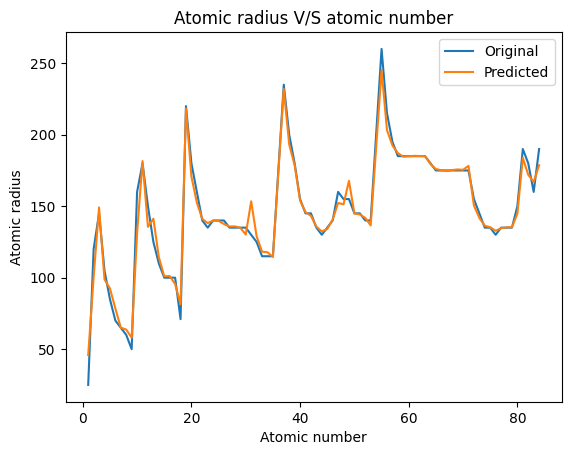

In [ ]:
plt.plot(z,r.reshape(1,len(r))[0])
plt.plot(z,r_pred)
plt.title('Atomic radius V/S atomic number')
plt.xlabel('Atomic number')
plt.ylabel('Atomic radius')
plt.legend(['Original','Predicted'])
plt.show()

# **Testing the model on new data(i.e. data after z>84 which are radio actives)**

In [ ]:
test_data=[[85,findRow(85),num_shells(85),890 ]
           ,[86,findRow(86),num_shells(86),1037]
           ,[87,findRow(87),num_shells(87),393]
           ,[88,findRow(88),num_shells(88),509 ]
           ,[89,findRow(89),num_shells(89),499]
           ,[90,findRow(90),num_shells(90),587.4]
           ,[91, findRow(91), num_shells(91), 568]
,[92, findRow(92), num_shells(92), 598]
,[93, findRow(93), num_shells(93), 605]
,[94, findRow(94), num_shells(94), 582]
,[95, findRow(95), num_shells(95), 579]
,[96, findRow(96), num_shells(96), 578]
,[97, findRow(97), num_shells(97), 601]
,[98, findRow(98), num_shells(98), 607]]

test_r=[[150],[120],[270],[215],[195],[179],[180],[175],[175],[175],[175],[174],[170],[186]]
test_r=np.array(test_r).reshape(1,len(test_r))[0]

pred_val=atomic_radius.predict(test_data)

e=[]
for i in range(len(test_data)):
  e.append((pred_val[i]-test_r[i])*100/test_r[i])
dict_new={'Original':test_r,'Predicted': pred_val,'%Error':np.array(e)}
new_df=pd.DataFrame(dict_new)
new_df.describe()

,Original,Predicted,%Error
count,14.000000,14.000000,14.000000
mean,181.357143,186.917857,4.865243
std,33.163017,16.076124,12.054551
min,120.000000,166.100000,-12.000000
25%,174.250000,182.162500,0.190171
50%,175.000000,183.350000,4.214286
75%,184.500000,183.500000,4.857143
max,270.000000,237.600000,38.416667
